# Scipy

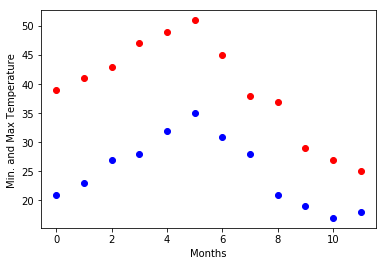

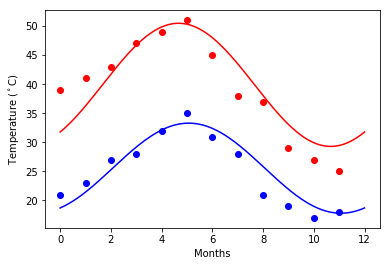

In [5]:
max_temp = [39,41,43,47,49,51,45,38,37,29,27,25] # Give max. temp.
min_temp = [21,23,27,28,32,35,31,28,21,19,17,18] # givein min. temp.

import matplotlib.pyplot as plt # for ploting the data points

import numpy as np # numpy used for calulation over array

np_max = np.array(max_temp) # Converting list into array
np_min = np.array(min_temp)
months_in_year = np.arange(12) # months in years
plt.plot(months_in_year,np_max,'ro')
plt.plot(months_in_year,np_min, 'bo')
plt.xlabel('Months')
plt.ylabel("Min. and Max Temperature ")

from scipy import  optimize

def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months_in_year,np_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months_in_year,np_min, [-40, 20, 0])
days = np.linspace(0, 12, num=365)
plt.figure()

plt.plot(months_in_year, np_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months_in_year, np_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')

plt.ylabel('Temperature ($^\circ$C)')
plt.xlabel('Months')
plt.show()

# Titanic Dataset

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
data = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')


In [11]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [12]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [17]:
data.sex.value_counts()

male      843
female    466
Name: sex, dtype: int64

Text(0,0.5,'male')

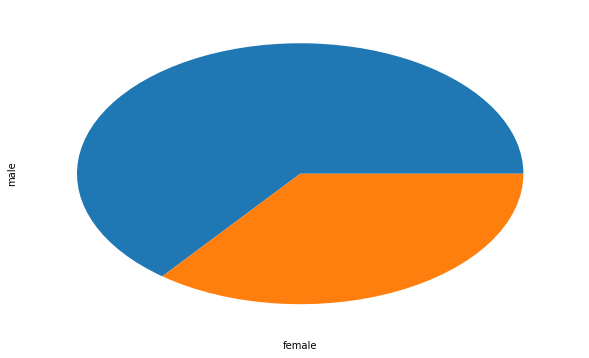

In [18]:
fig = plt.figure(figsize=(10,6))
plt.pie(data.sex.value_counts())
plt.xlabel('female')
plt.ylabel('male')

Text(0,0.5,'Fare')

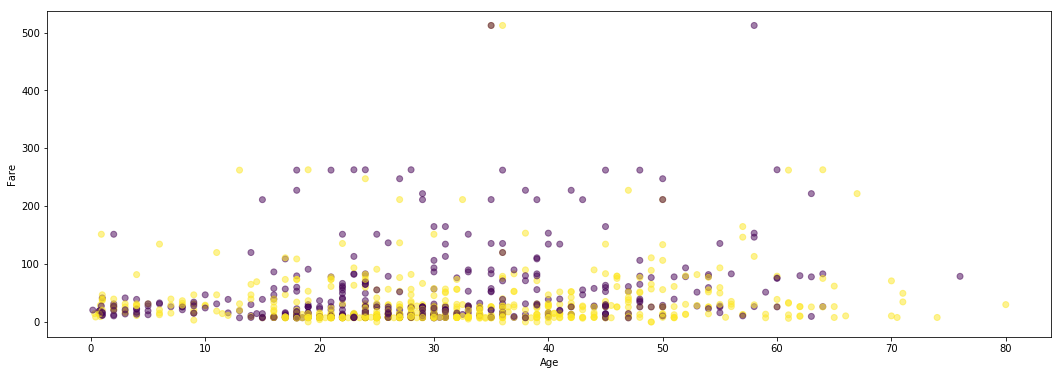

In [19]:
fig = plt.figure(figsize=(18,6))
plt.scatter(data['age'], data['fare'], alpha=0.5, c=pd.factorize(data['sex'])[0])
plt.xlabel('Age')
plt.ylabel('Fare')